<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileCKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
DrugDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DrugDF.xlsx')
DrugDF.shape

(52620, 28)

> **Remove Pricipal keep StartDTTM and EndDTTM instead**

In [3]:
import pandas as pd
VisitDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VisitDF.xlsx')
VisitDF.shape

(52620, 13)

In [4]:
import pandas as pd
DiagDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DiagDF.xlsx')
DiagDF.shape

(52620, 20)

In [5]:
import pandas as pd
LabDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/LabDF.xlsx')
LabDF.shape

(52620, 36)

In [6]:
import pandas as pd
VitalDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VitalDF.xlsx')
VitalDF.shape

(52620, 8)

In [8]:
VisitDF = VisitDF.iloc[:, 1:]
VitalDF = VitalDF.iloc[:, 1:]
LabDF = LabDF.iloc[:, 1:]
DiagDF = DiagDF.iloc[:, 1:]
DrugDF = DrugDF.iloc[:, 1:]

## **Merge**

In [9]:
import pandas as pd

# Assuming you have four dataframes: DrugDF1, DiagDF, DrugDF2, LabDF

# Merge DrugDF1, DiagDF, DrugDF2, and LabDF based on the common columns
merged_df = DrugDF.merge(VisitDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(VitalDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(DiagDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(LabDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer')

# The merged_df will contain all the data from the four dataframes, merged on the common columns.
merged_df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,123.0,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,146.0,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,129.0,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,139.0,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,129.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,84.0,43,NaN,NaN,12.11,131.3,NaN,NaN,NaN,NaN
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,83.0,42,NaN,NaN,9.15,325.8,NaN,NaN,NaN,NaN
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,64.0,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_df.shape

(52620, 88)

## **Add Variable**

> **LabLocation (mode) column and fill null in VisitLocation**

In [11]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

mode_location = lab.groupby('PatientUID')['Location'].apply(lambda x: x.mode()[0]).reset_index()
mode_dict = dict(zip(mode_location['PatientUID'], mode_location['Location']))
merged_df['Location'] = merged_df.apply(lambda row: mode_dict[row['PatientUID']] if pd.isnull(row['Location']) else row['Location'], axis=1)

In [12]:
merged_df['LabLocation'] = lab['PatientUID'].map(mode_location.set_index('PatientUID')['Location'])

In [13]:
merged_df.shape

(52620, 89)

> **LabCWhen**

In [15]:
lab_dict = dict(zip(lab['PatientVisitUID'], lab['CWhen']))
merged_df['LabCwhen'] = merged_df['PatientVisitUID'].map(lab_dict)

In [16]:
merged_df[['PatientUID','PatientVisitUID','LabCwhen']].isnull().any()

PatientUID         False
PatientVisitUID    False
LabCwhen           False
dtype: bool

> **Recent_Creatinine Recent_eGFR Recent_Date**

In [17]:
import pandas as pd
df0 = pd.DataFrame(lab)
df = pd.DataFrame(df0)
df = df[['PatientUID', 'ResultItemName', 'ResultValue', 'CWhen']]
df['ResultItemName'] = df['ResultItemName'].replace(['CREATININE, 32202'], 'Creatinine')
df = df[df['ResultItemName'].isin(['eGFR(CKD-EPI) age >=18', 'Creatinine'])]
pivot = df.pivot(index=['PatientUID', 'CWhen'], columns='ResultItemName', values='ResultValue').reset_index()
sort = pivot.sort_values('CWhen').groupby('PatientUID').tail(1)
sort[['Creatinine', 'eGFR(CKD-EPI) age >=18']] = sort.groupby('PatientUID')[['Creatinine', 'eGFR(CKD-EPI) age >=18']].apply(lambda x: x.ffill().bfill())
result = sort.rename(columns={'Creatinine': 'Recent_Creatinine', 'eGFR(CKD-EPI) age >=18': 'Recent_eGFR', 'CWhen':'Recent_Date'})

<ipython-input-17-97383c362ca0>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sort[['Creatinine', 'eGFR(CKD-EPI) age >=18']] = sort.groupby('PatientUID')[['Creatinine', 'eGFR(CKD-EPI) age >=18']].apply(lambda x: x.ffill().bfill())


>> **fill Recent_eGFR and Recent_Cretinine null** >> with latest value before

In [18]:
result[result['PatientUID']==2266212]

ResultItemName,PatientUID,Recent_Date,Recent_Creatinine,Recent_eGFR
508334,2266212,2562-08-05 09:31:23.897,ND,ND


In [19]:
pivot[pivot['PatientUID']==2266212].sort_values('CWhen').tail(2)

ResultItemName,PatientUID,CWhen,Creatinine,eGFR(CKD-EPI) age >=18
508333,2266212,2562-07-25 07:26:39.253,1.20,62.60
508334,2266212,2562-08-05 09:31:23.897,ND,ND


In [20]:
# Fill the NaN values
import numpy as np

# Fill specific NaN values
result['Recent_eGFR'] = result['Recent_eGFR'].mask(result['PatientUID'] == 21282, result['Recent_eGFR'].fillna(55.50))
result['Recent_eGFR'] = result['Recent_eGFR'].mask(result['PatientUID'] == 173101, result['Recent_eGFR'].fillna(72.85))

result['Recent_Creatinine'] = result['Recent_Creatinine'].mask(result['PatientUID'] == 792446, result['Recent_Creatinine'].fillna(1.74))

# Verify if there are still any null values
print(result.isnull().any())

ResultItemName
PatientUID           False
Recent_Date          False
Recent_Creatinine    False
Recent_eGFR          False
dtype: bool


In [21]:
result.loc[result['PatientUID'] == 2266212, 'Recent_Date'] = result['Recent_Date'].replace('2562-08-05 09:31:23.897', method='ffill')
result.loc[result['PatientUID'] == 2266212, 'Recent_Creatinine'] = result.loc[result['PatientUID'] == 2266212, 'Recent_Creatinine'].replace('ND', '1.20')
result.loc[result['PatientUID'] == 2266212, 'Recent_eGFR'] = result.loc[result['PatientUID'] == 2266212, 'Recent_eGFR'].replace('ND', '62.60')

In [22]:
result[result['PatientUID']==2266212]

ResultItemName,PatientUID,Recent_Date,Recent_Creatinine,Recent_eGFR
508334,2266212,2562-08-05 07:29:44.017,1.20,62.60


In [23]:
# Merging the 'latest' DataFrame with 'merged_df' based on 'PatientUID'
merged_df = pd.merge(result[['PatientUID', 'Recent_Creatinine', 'Recent_eGFR','Recent_Date']], merged_df, on='PatientUID', how='inner')

> **VisitLocation**

In [24]:
merged_df = merged_df.rename(columns={'Location': 'VisitLocation'})

>> **Fill null of StartDTTM and EndDttm** by mode of each ID

In [25]:
merged_df[merged_df[['StartDTTM', 'EndDttm']].isnull().any(axis=1)][['PatientUID','StartDTTM', 'EndDttm']].shape

(1, 3)

In [26]:
import pandas as pd
visit = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Visit.csv')
mode_start = visit.groupby('PatientUID')['StartDTTM'].apply(lambda x: x.mode()[0]).reset_index()
mode_dt = dict(zip(mode_start['PatientUID'], mode_start['StartDTTM']))
merged_df['StartDTTM'] = merged_df.apply(lambda row: mode_dt[row['PatientUID']] if pd.isnull(row['StartDTTM']) else row['StartDTTM'], axis=1)

mode_end = visit.groupby('PatientUID')['EndDttm'].apply(lambda x: x.mode()[0]).reset_index()
mode_tm = dict(zip(mode_end['PatientUID'], mode_end['EndDttm']))
merged_df['EndDttm'] = merged_df.apply(lambda row: mode_tm[row['PatientUID']] if pd.isnull(row['EndDttm']) else row['EndDttm'], axis=1)

<ipython-input-26-d0d6603bb3a0>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Visit.csv')


In [27]:
merged_df[merged_df[['StartDTTM', 'EndDttm']].isnull().any(axis=1)][['PatientUID','StartDTTM', 'EndDttm']].shape

(0, 3)

In [28]:
merged_df['PatientUID'].nunique() #number of patient

18168

In [29]:
merged_df.shape

(52620, 93)

> **Hand fill missing value**

In [30]:
merged_df['Age'] = merged_df['Age'].fillna('69')
merged_df['Sex'] = merged_df['Sex'].fillna('หญิง')
merged_df['NATNL'] = merged_df['NATNL'].fillna('ไทย')
merged_df['InPatient'] = merged_df['InPatient'].fillna(0)
merged_df['OutPatient'] = merged_df['OutPatient'].fillna(1)
merged_df['Emergency'] = merged_df['Emergency'].fillna(0)

##**Check Type**

In [31]:
df = pd.DataFrame(merged_df)

In [32]:
int_type = ['InPatient', 'OutPatient', 'Emergency','Age']
float_type = ['L1:eGFR','L2:BUN', 'L3:Creatinine','L4:Sodium','L5:Potassium','L6:Chloride','L7:Bicarbonate','L8:Uric',
              'L9:Calcium','L10:Phosphorus', 'L11:Albumin','L12:Hemoglobin','L13:Hematocrit','L14:WBC','L15:Platelet','L16:TIBC',
              'L17:Tranferin SAT','L18:Ferritin','L19:Blood sugar','L20:HbA1c','L21:Cholesterol','L22:Triglyceride','L23:LDL Cholesterol',
              'L24:HDL Cholesterol','L25:Parathyroid hormone','L26:Vitamin D','L27:UrineAlbumin/Cr ratio','L28:UrineProtein/Cr ratio',
              'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)','L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)',
              'BMI','BSA','Systolic BP','Diastolic BP','Recent_Creatinine','Recent_eGFR']
object_type = ['LabLocation','VisitLocation','NATNL','Sex']
datetime_type = ['CWhen','Recent_Date','StartDTTM','EndDttm'] ## ใช้เป็น object เหมือนเดิม

In [33]:
import numpy as np
for column in int_type:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

for column in float_type:
    df[column] = pd.to_numeric(df[column], errors='coerce')

for column in object_type:
    df[column] = df[column].astype(str)

# Replace 'ND' values with NaN
df.replace('ND', np.nan, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52620 entries, 0 to 52619
Data columns (total 93 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PatientUID                    52620 non-null  int64  
 1   Recent_Creatinine             52620 non-null  float64
 2   Recent_eGFR                   52620 non-null  float64
 3   Recent_Date                   52620 non-null  object 
 4   PatientVisitUID               52620 non-null  int64  
 5   Slopes                        52620 non-null  float64
 6   G1M2:ARB                      52620 non-null  int64  
 7   G3M1:Statin                   52620 non-null  int64  
 8   G5M2:NSAIDs                   52620 non-null  int64  
 9   G1M5:Diuretic                 52620 non-null  int64  
 10  G1M7:Beta blocker             52620 non-null  int64  
 11  G1M3:Dihydropyridine CCB      52620 non-null  int64  
 12  G1M6:MRA                      52620 non-null  int64  
 13  G

### **CheckMissing**

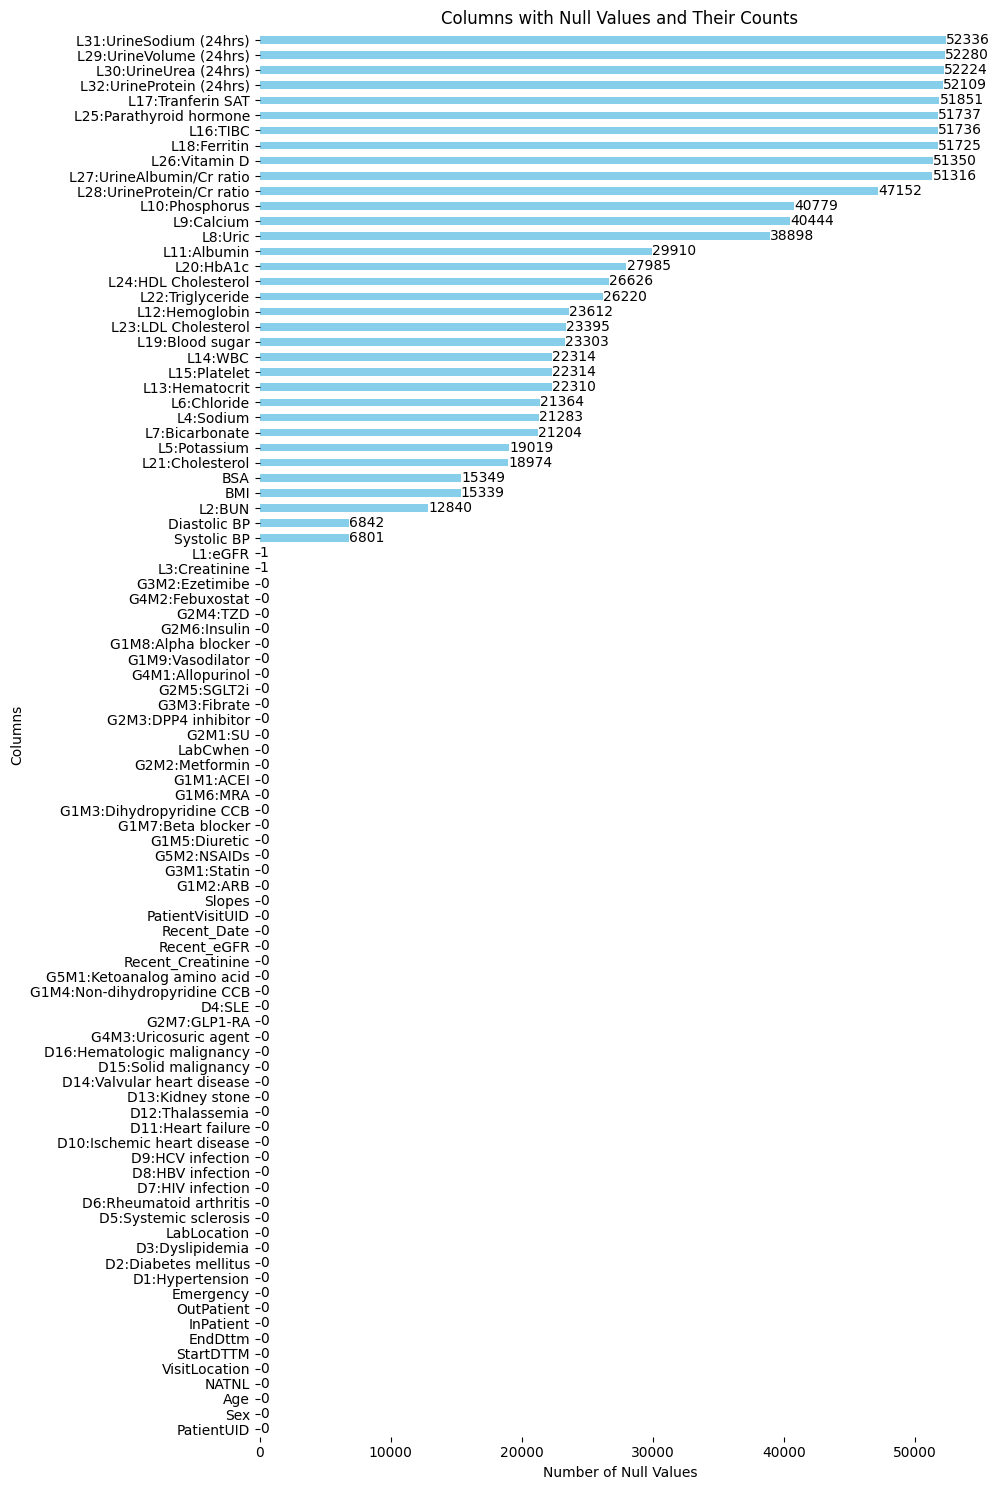

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()


>> **Outliers**

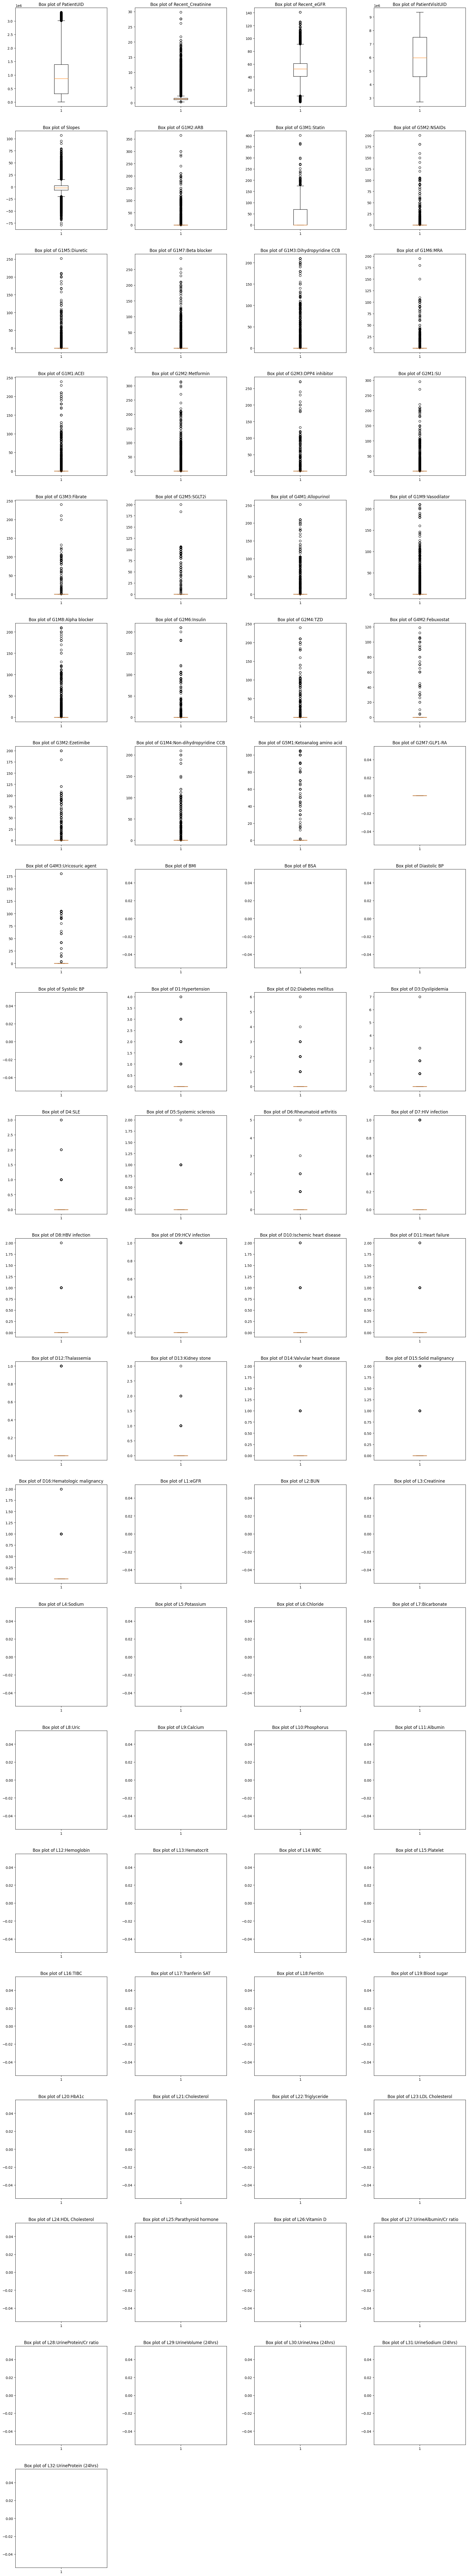

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numeric_columns)
num_plots_per_row = 4
num_rows = num_cols // num_plots_per_row + 1

fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numeric_columns):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    axs[row, col].boxplot(df[column])
    axs[row, col].set_title('Box plot of ' + column)

# Hide empty subplots
for i in range(num_cols, num_rows * num_plots_per_row):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    fig.delaxes(axs[row, col])

plt.show()


>>> **non null column**

<ipython-input-41-9bbd018d624c>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  numeric_columns = df.select_dtypes(include=[pd.np.number]).columns.tolist()


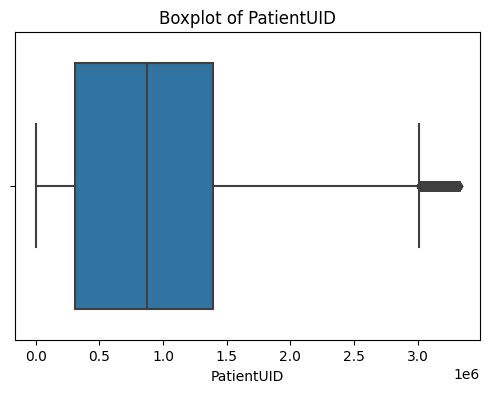

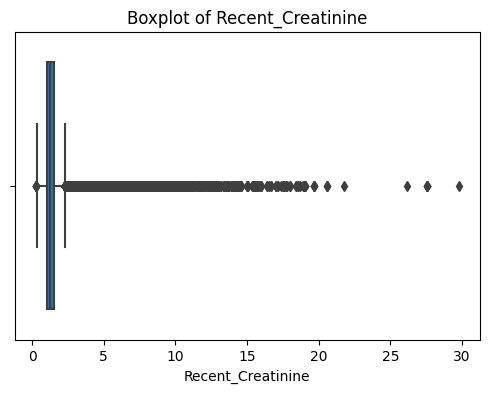

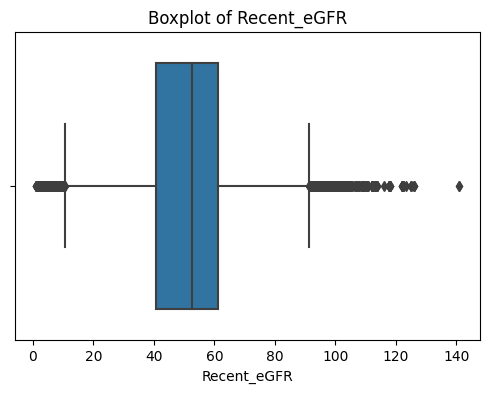

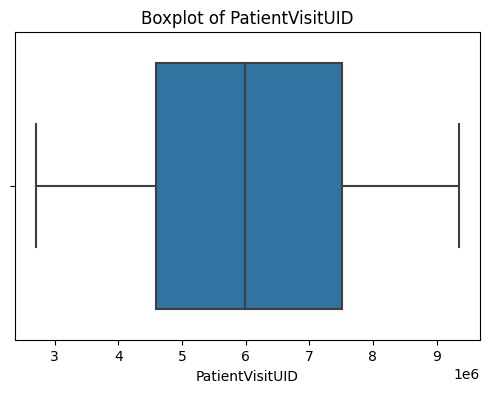

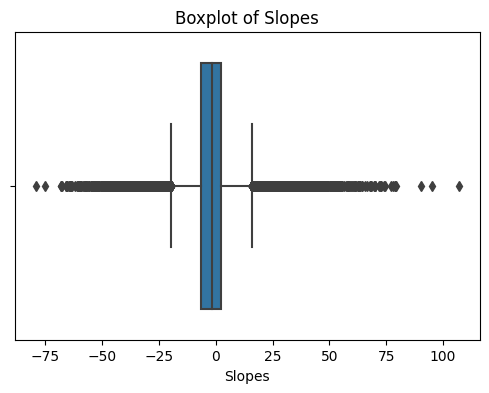

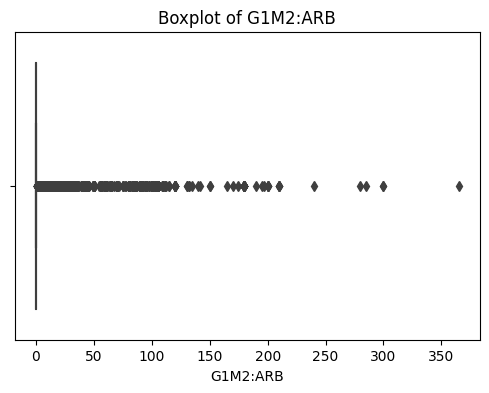

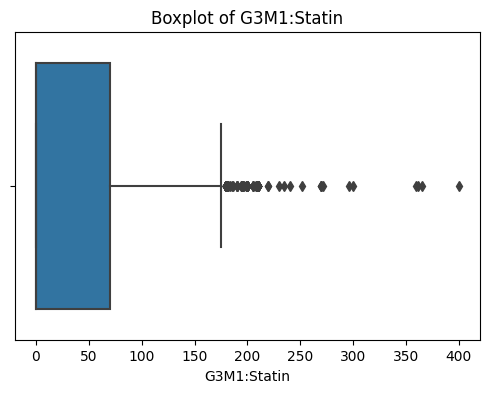

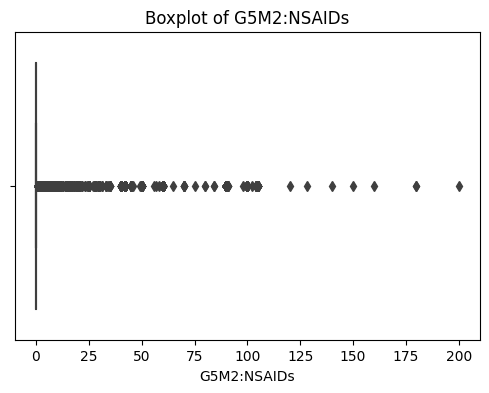

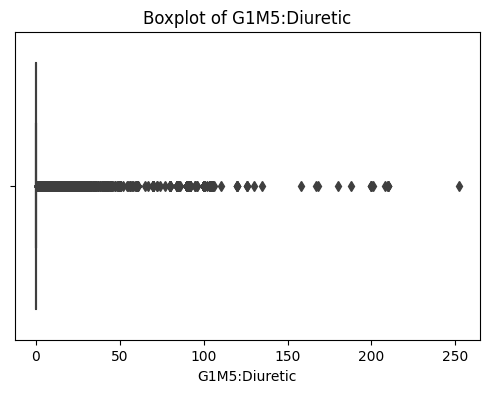

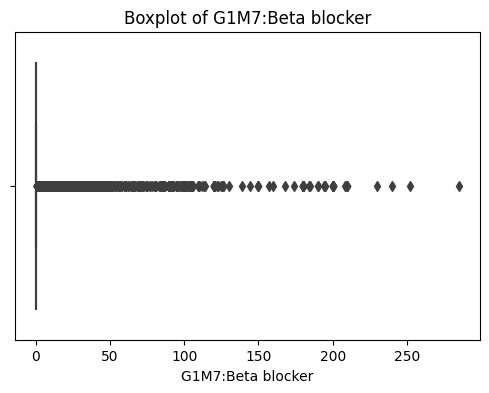

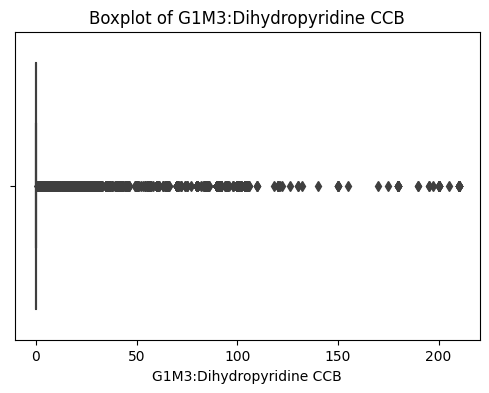

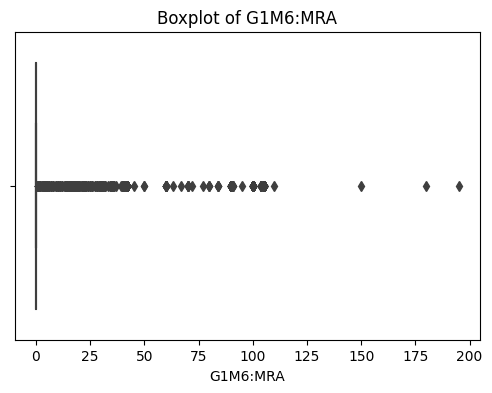

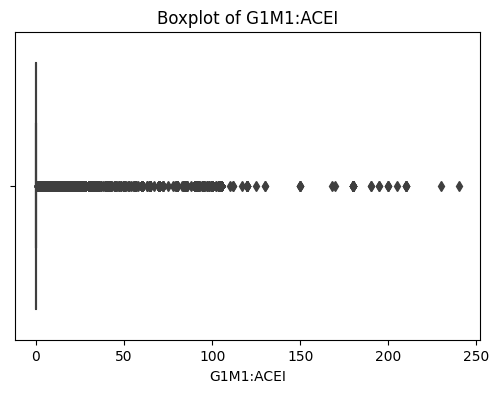

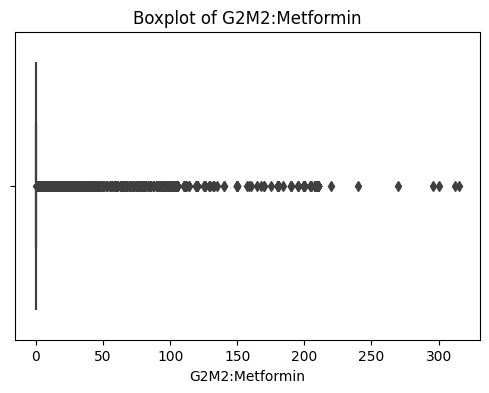

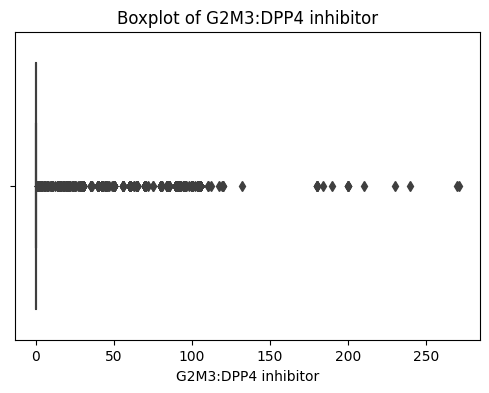

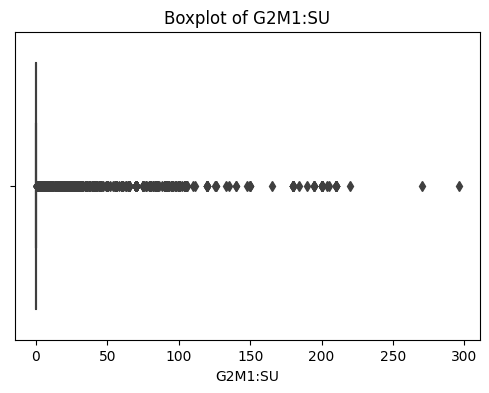

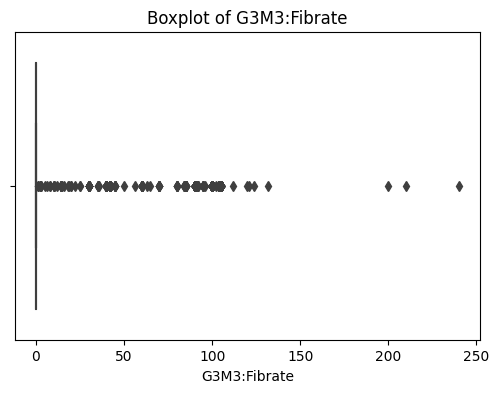

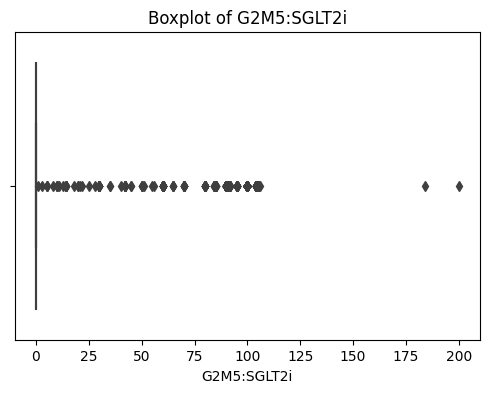

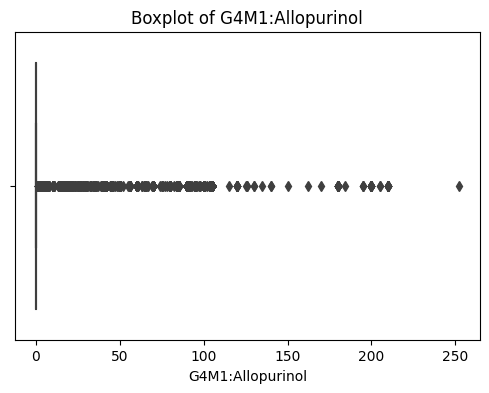

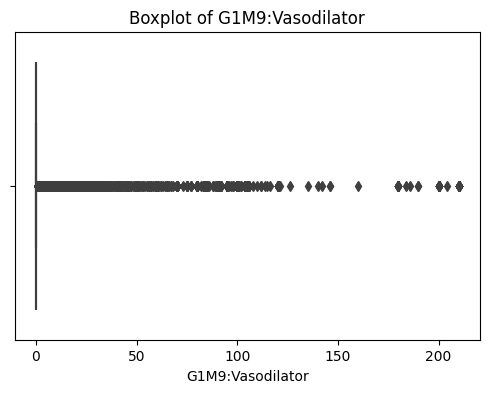

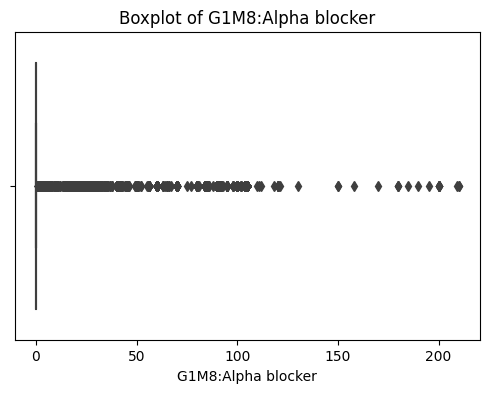

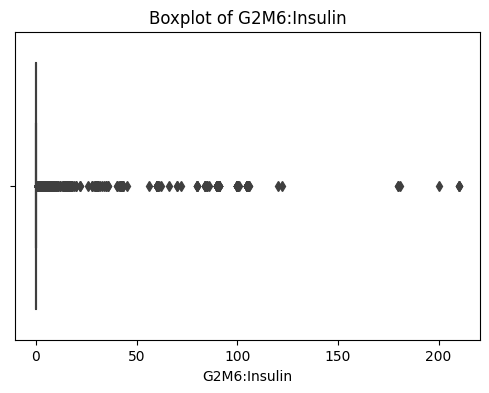

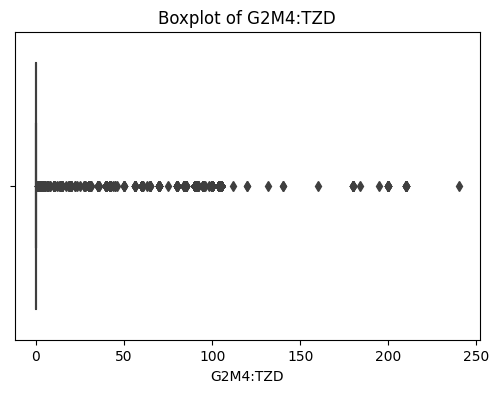

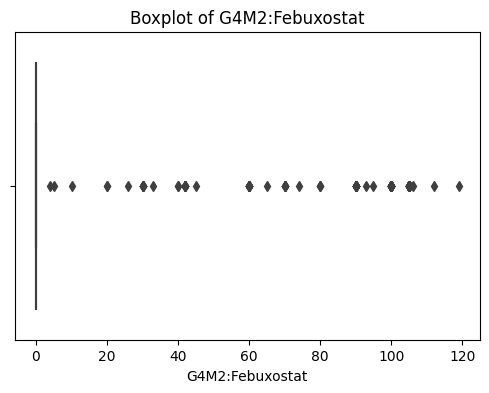

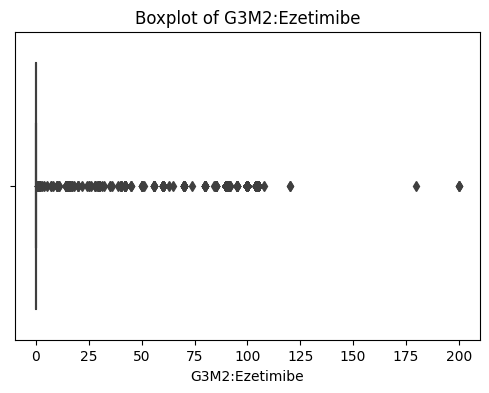

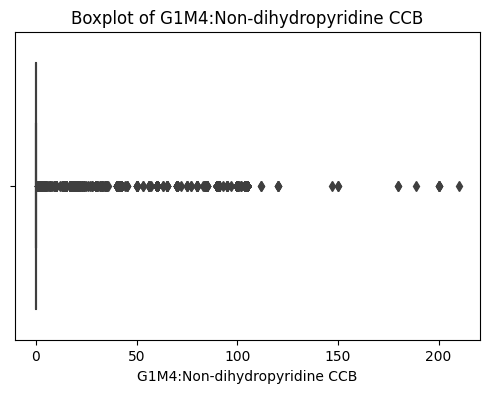

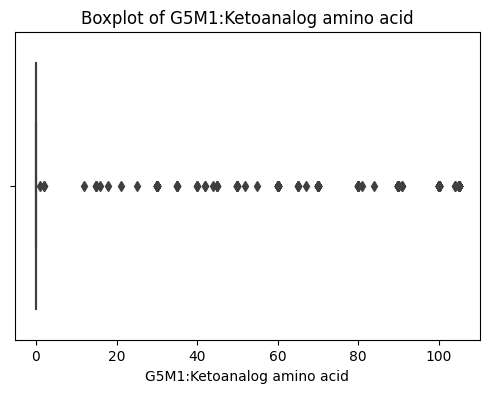

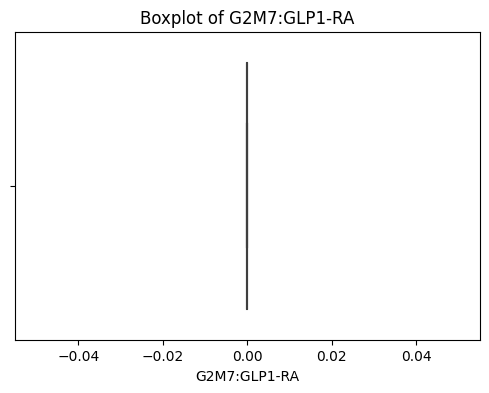

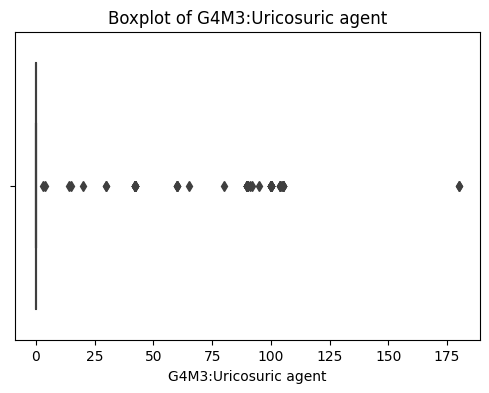

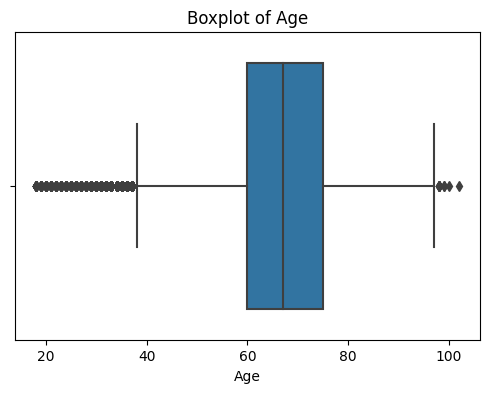

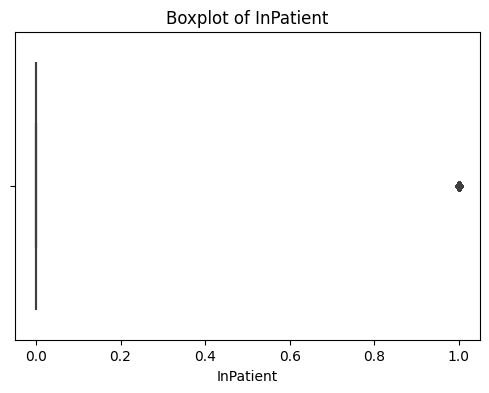

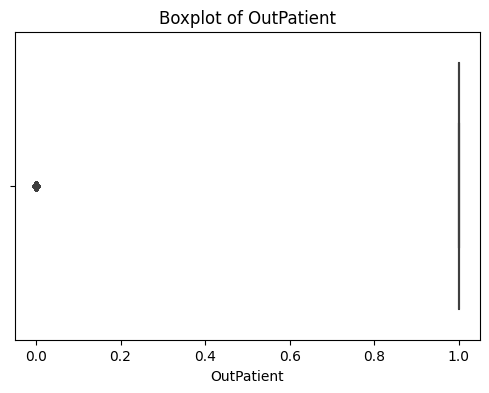

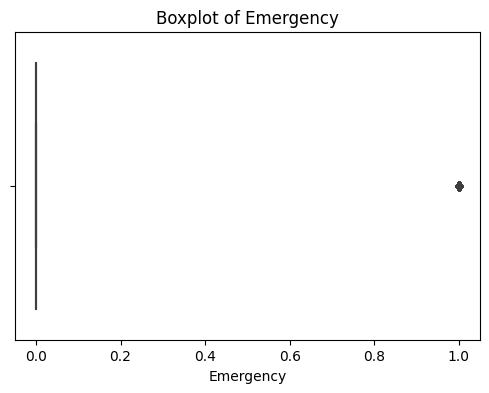

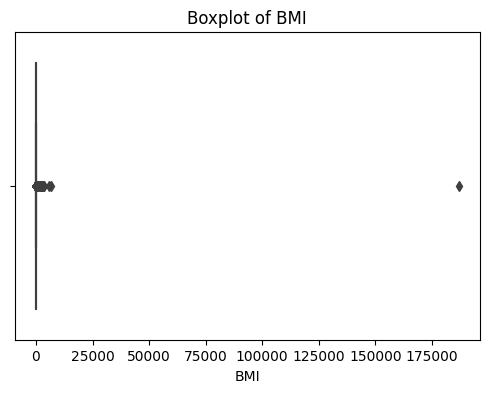

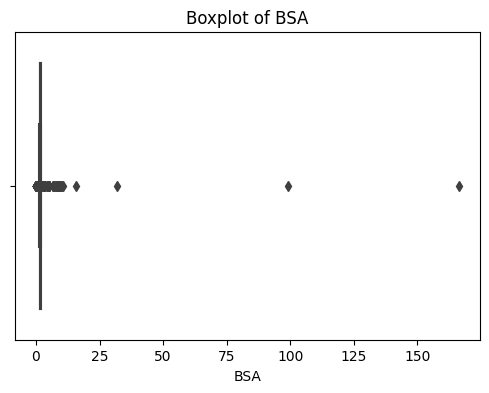

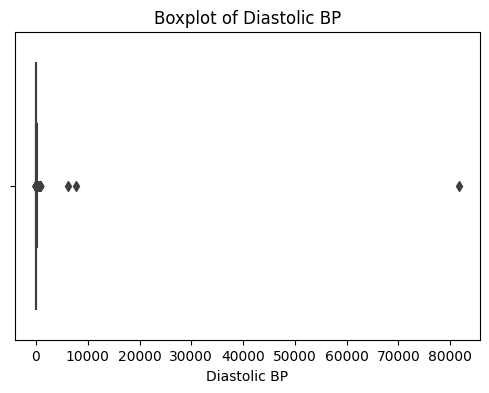

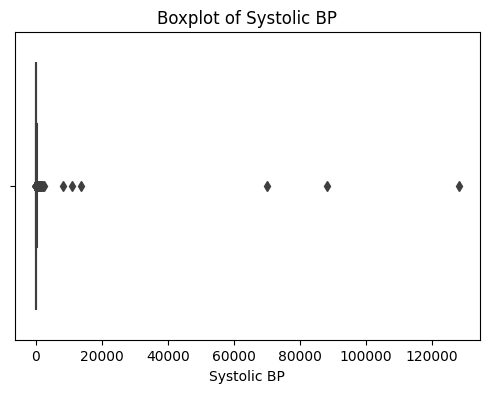

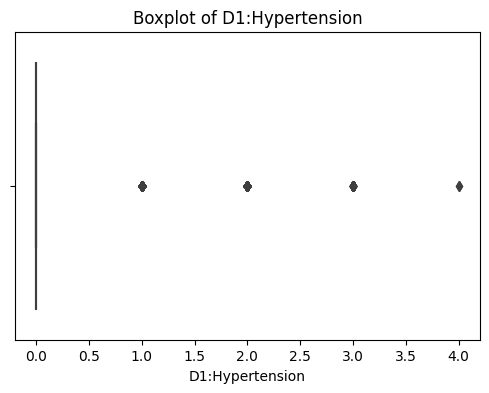

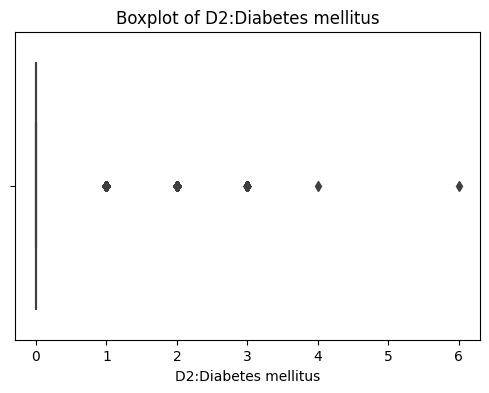

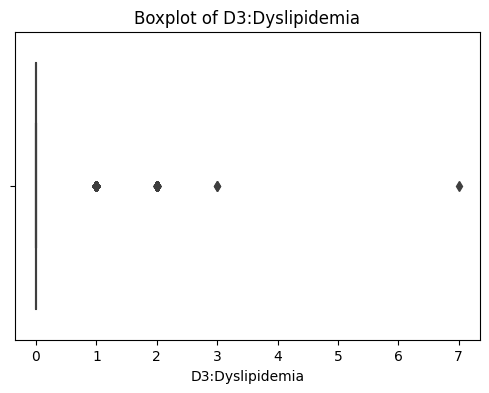

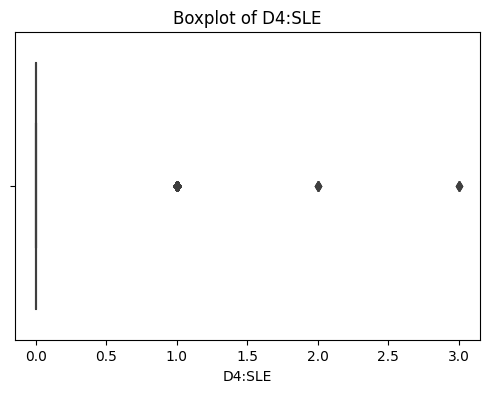

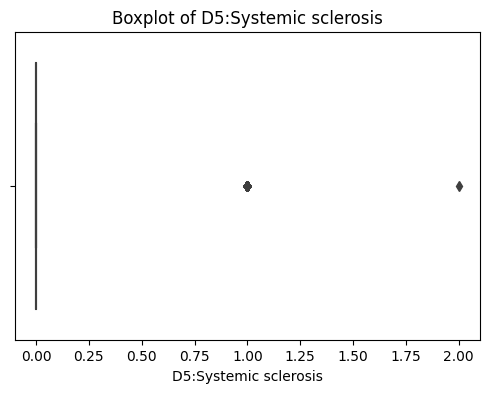

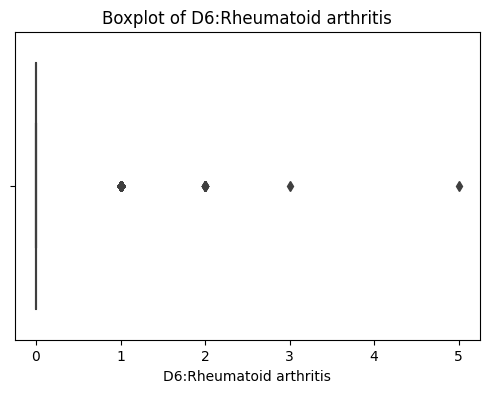

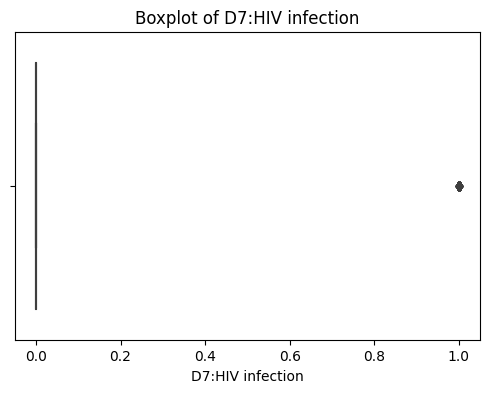

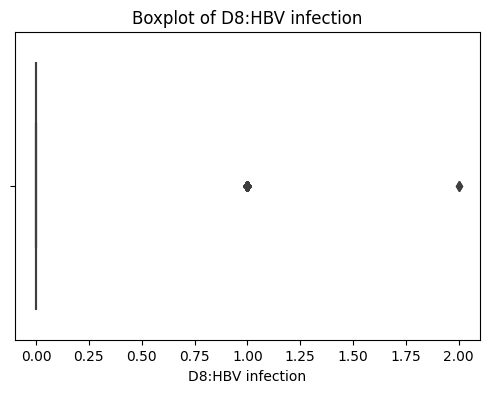

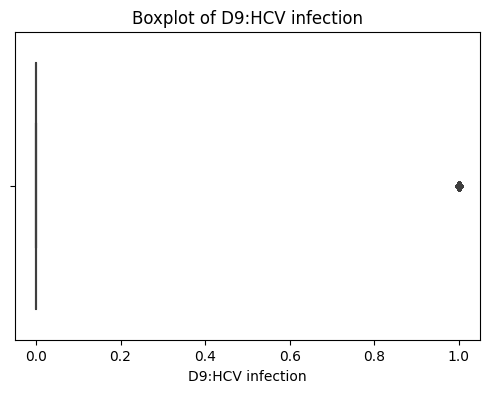

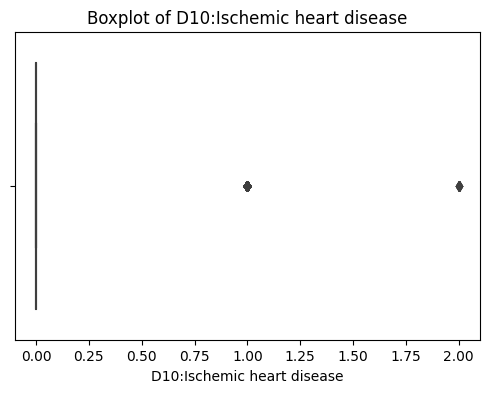

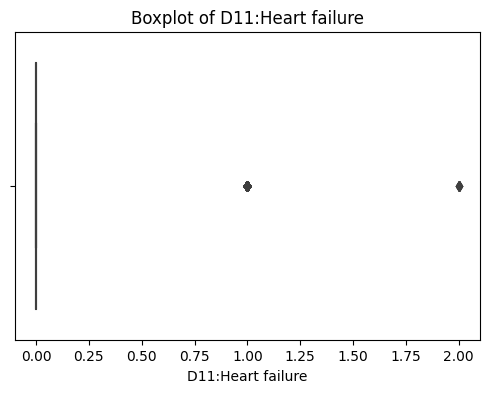

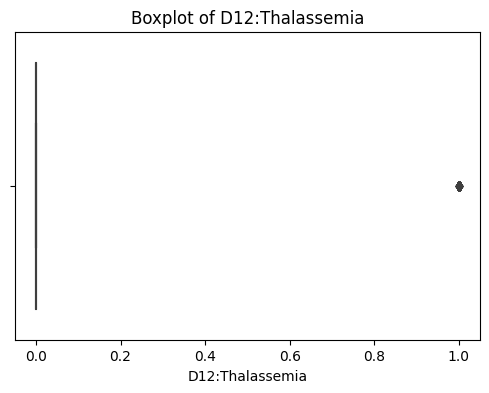

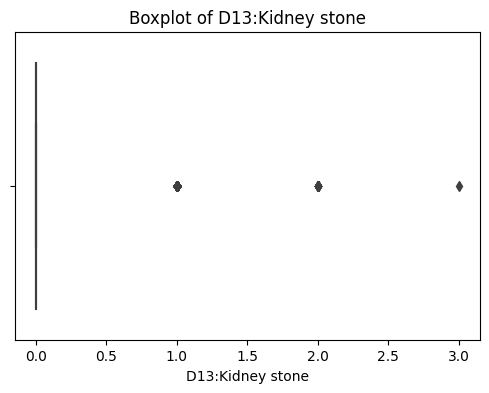

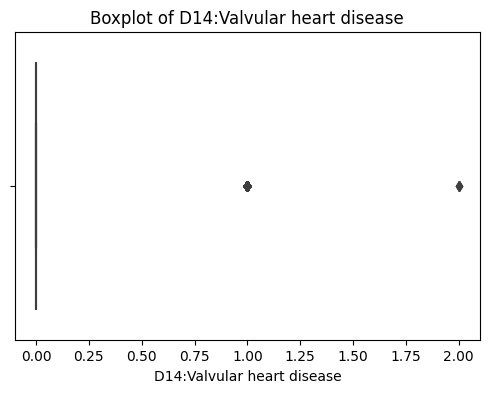

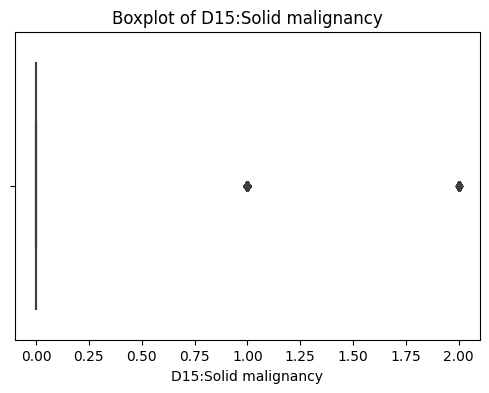

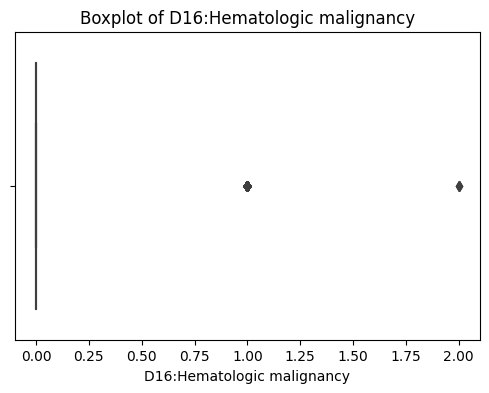

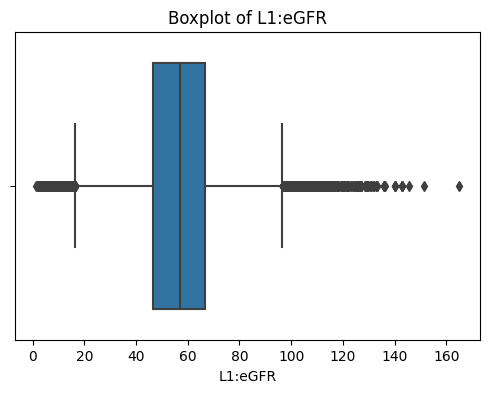

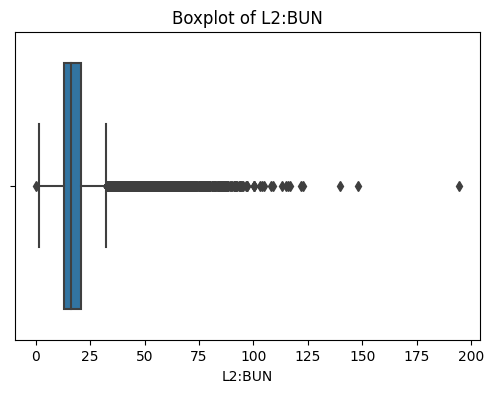

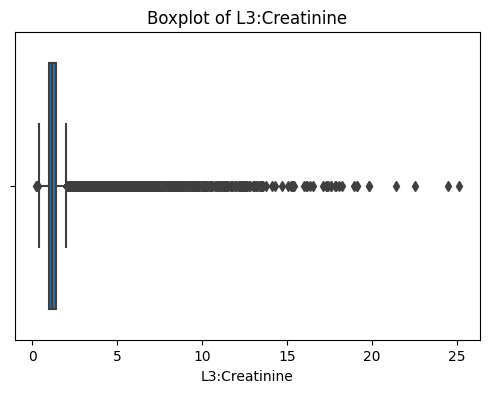

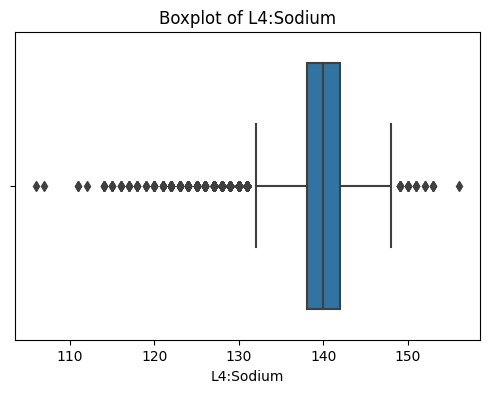

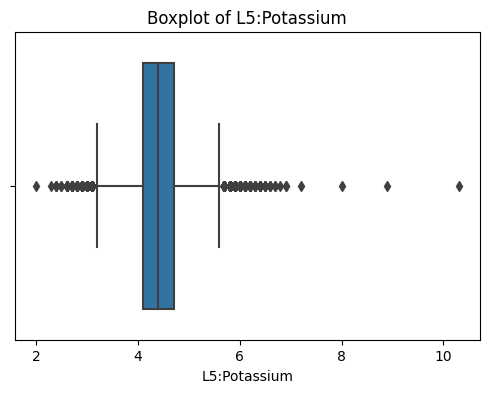

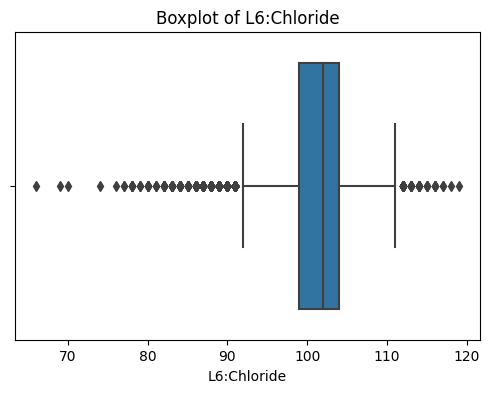

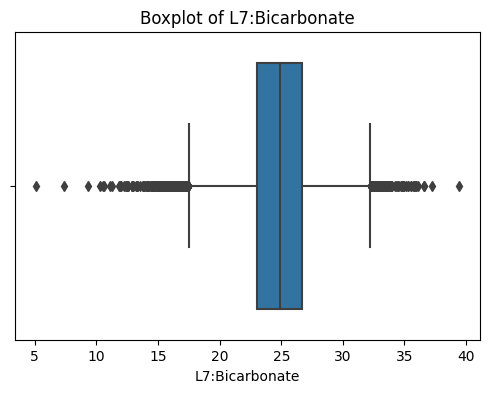

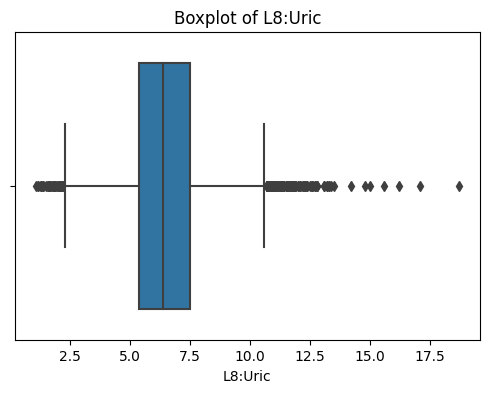

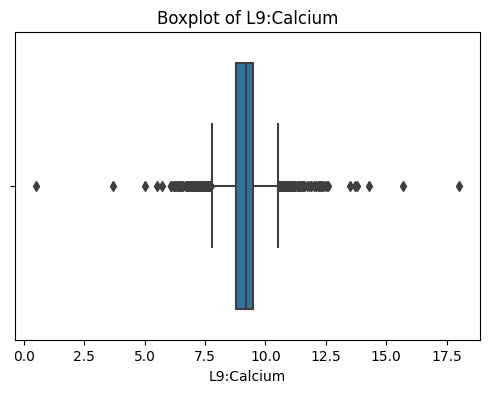

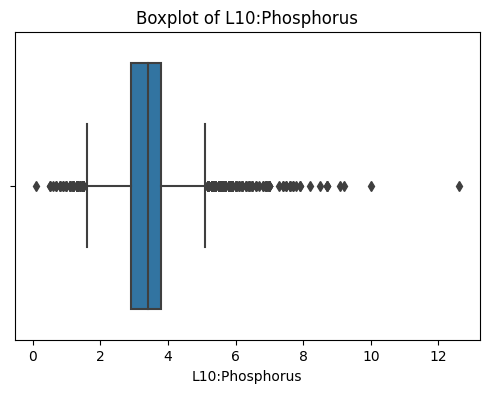

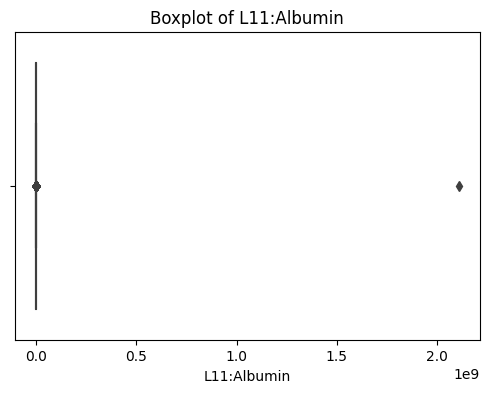

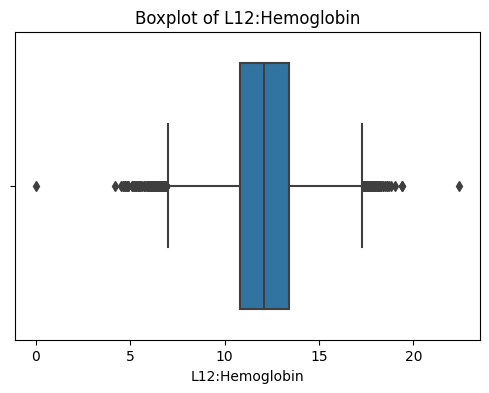

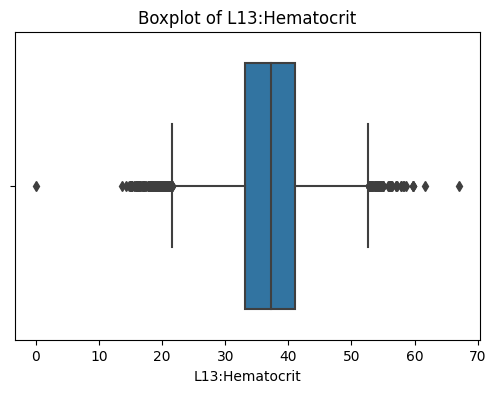

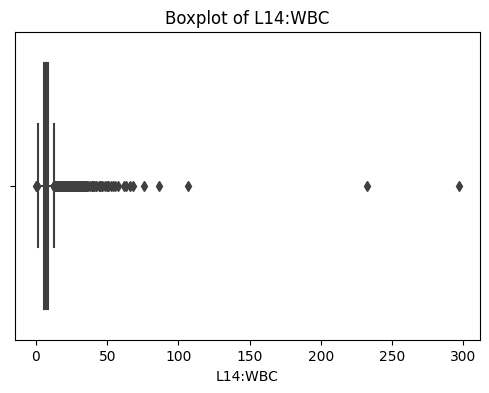

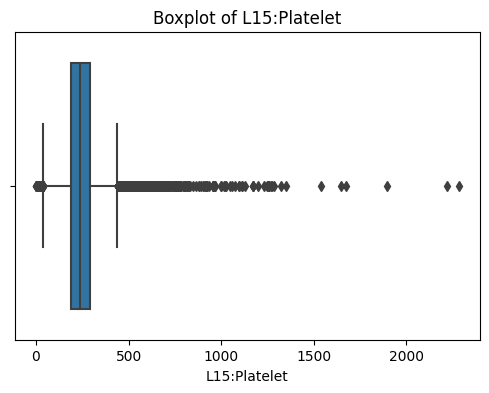

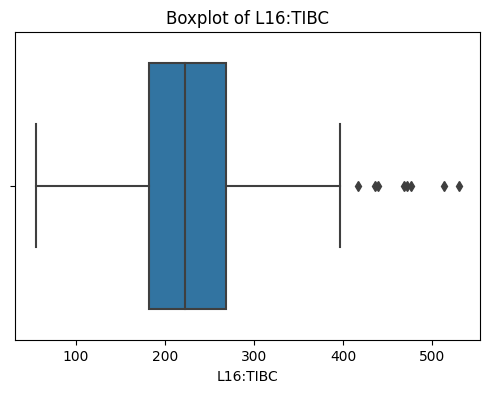

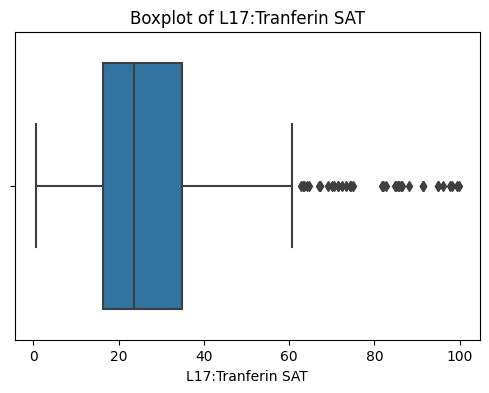

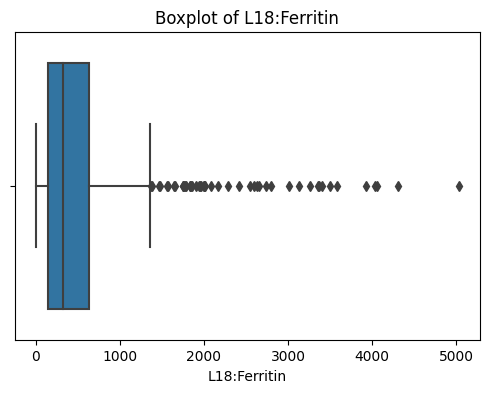

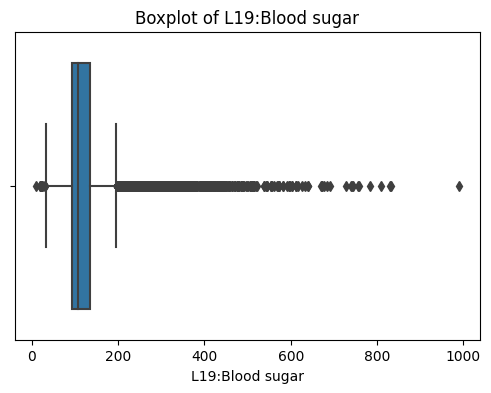

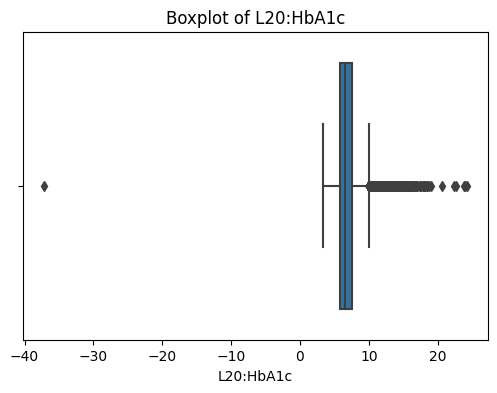

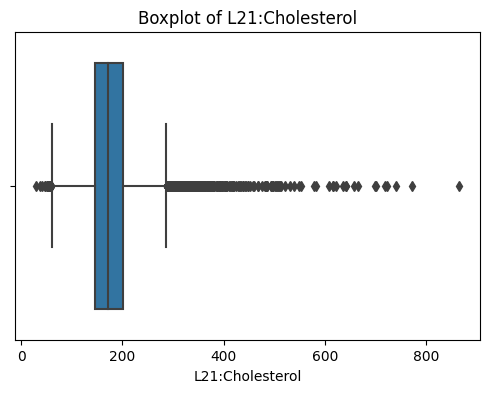

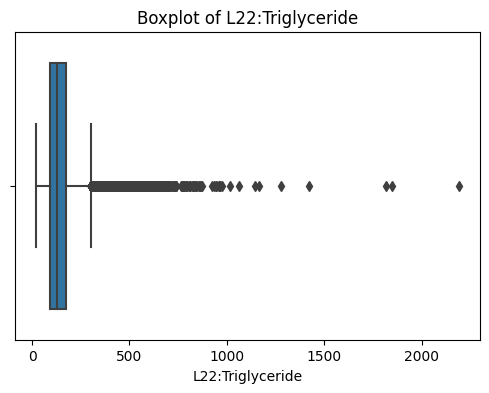

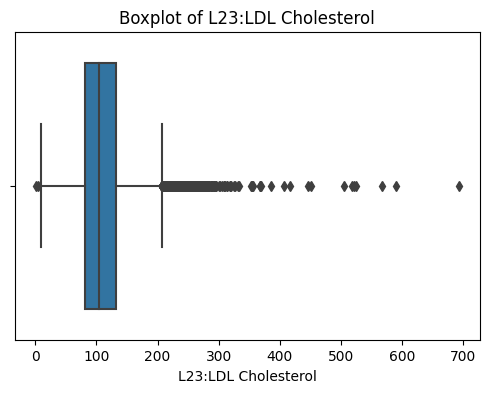

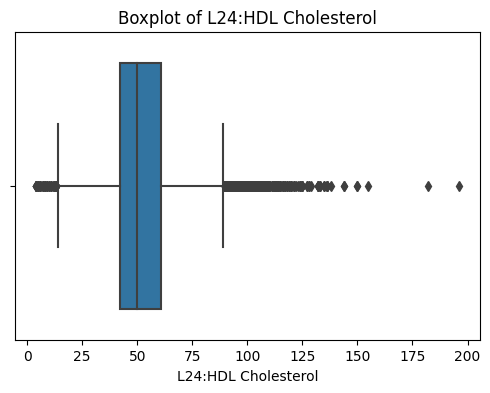

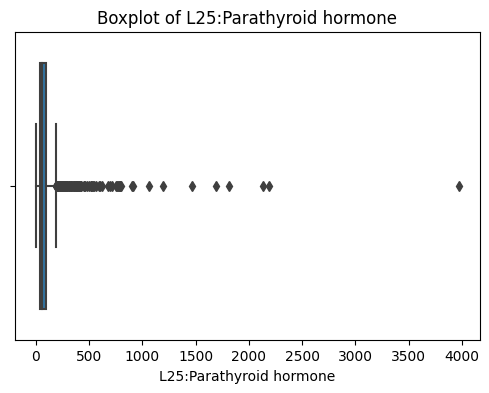

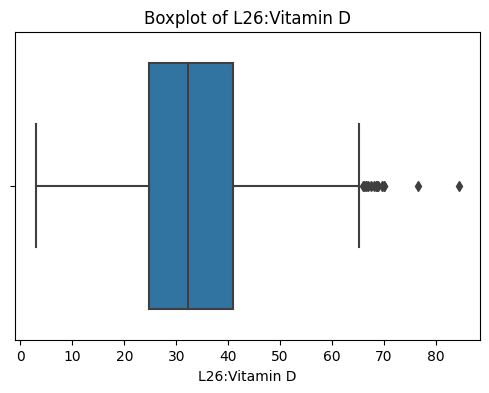

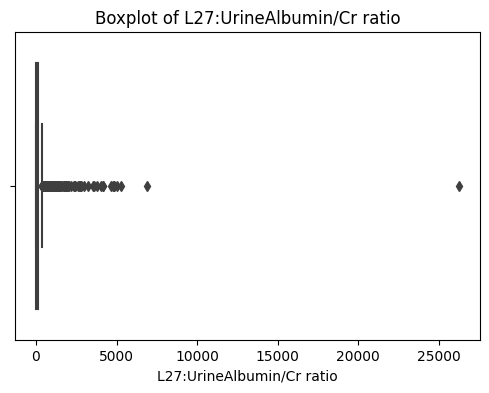

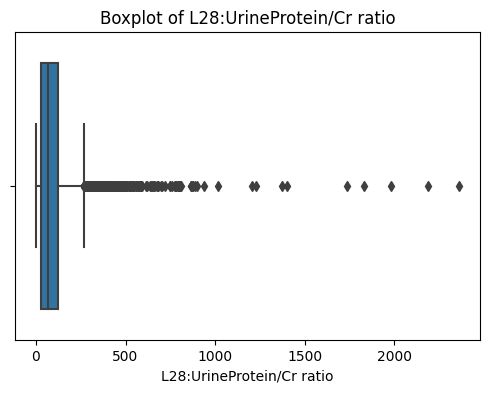

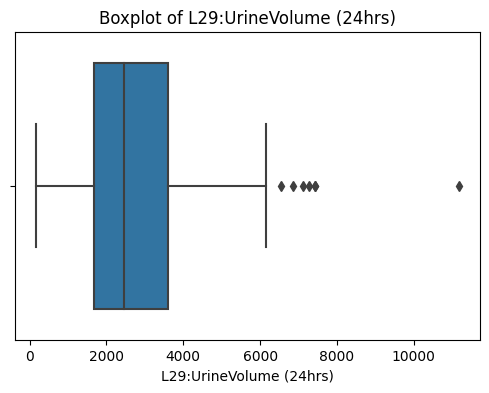

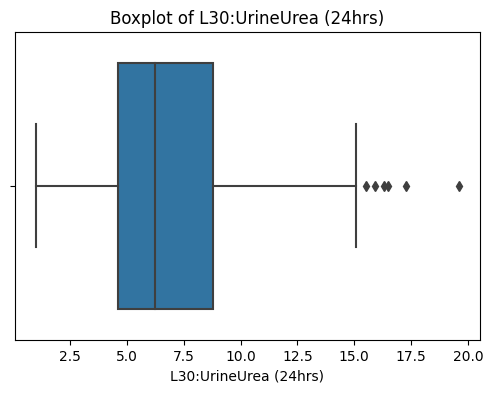

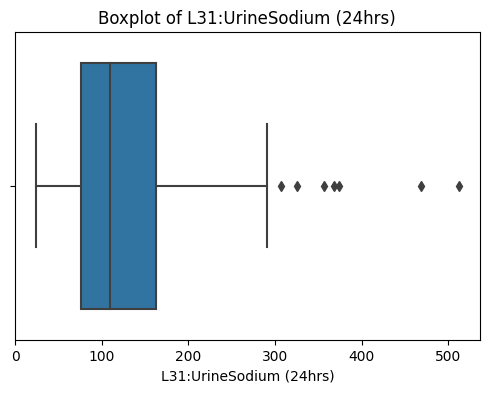

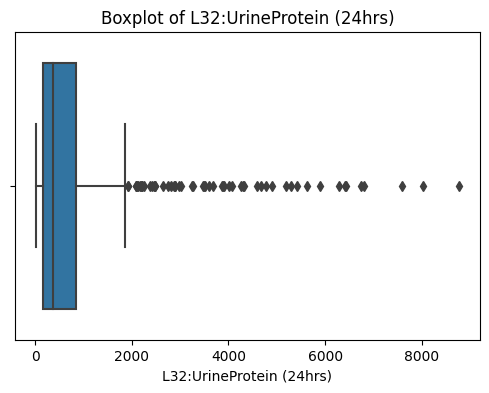

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Filter numeric non-null columns
numeric_columns = df.select_dtypes(include=[pd.np.number]).columns.tolist()

# Create box plots for each column
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [42]:

import pandas as pd

# Assuming df is your DataFrame

# Select columns that contain null values
columns_with_null = [col for col in df.columns if df[col].isnull().any()]

# Define a function to detect outliers using z-score for columns with null values
def detect_outliers_z_score(data, columns, threshold=3):
    outliers = {}
    for column in columns:
        column_data = data[column]
        if any(abs((column_data - column_data.mean()) / column_data.std()) > threshold):
            outliers[column] = column_data
    return outliers

# Detect columns with outliers for columns that have null values using the z-score method
outliers = detect_outliers_z_score(df, columns_with_null)
columns_with_outliers = list(outliers.keys())
columns_without_outliers = [col for col in columns_with_null if col not in columns_with_outliers]

print("Columns with outliers and null values:")
print(columns_with_outliers)

print("\nColumns without outliers and null values:")
print(columns_without_outliers)


Columns with outliers and null values:
['BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin', 'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC', 'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c', 'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D', 'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio', 'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)', 'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)']

Columns without outliers and null values:
[]


In [43]:
df

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,924852,2.63,15.80,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,989278,2.03,32.30,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2103792,1.05,55.90,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,953611,1.03,51.10,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,488150,1.94,32.60,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,43763,1.30,55.28,2566-04-10 15:34:20.643,4553420,-4.929870,0,90,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-10-05 08:55:06.223
52616,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,16.017287,0,90,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52617,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-24.861814,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52618,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,4.558175,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263


##**Remove Missing Variable 50k up**


In [45]:
remove = ['L16:TIBC','L17:Tranferin SAT','L18:Ferritin','L25:Parathyroid hormone','L26:Vitamin D','L27:UrineAlbumin/Cr ratio',
          'L29:UrineVolume (24hrs)','L30:UrineUrea (24hrs)','L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)']
df = df.drop(remove, axis=1)

In [47]:
df

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation,LabCwhen
0,924852,2.63,15.80,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,30,...,NaN,NaN,7.2,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,989278,2.03,32.30,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,0,...,480.0,NaN,NaN,202.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2103792,1.05,55.90,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,0,...,442.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,953611,1.03,51.10,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,0,...,NaN,133.0,6.9,201.0,177.0,147.0,30.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,488150,1.94,32.60,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,0,...,253.0,97.0,NaN,NaN,NaN,NaN,NaN,17.0,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,43763,1.30,55.28,2566-04-10 15:34:20.643,4553420,-4.929870,0,90,0,0,...,NaN,178.0,8.7,170.0,228.0,122.0,37.0,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-10-05 08:55:06.223
52616,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,16.017287,0,90,0,90,...,NaN,139.0,8.2,160.0,188.0,101.0,41.0,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52617,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-24.861814,0,0,0,0,...,NaN,128.0,7.6,158.0,172.0,113.0,40.0,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52618,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,4.558175,0,0,0,0,...,NaN,NaN,NaN,162.0,170.0,112.0,39.0,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263


In [46]:
df.to_excel('WideTable.xlsx')